In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install pyunpack
!pip install patool

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyunpack import Archive
Archive('/content/drive/My Drive/Colab Notebooks/CatvsDogs.rar').extractall('/content')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:

import os
filenames = os.listdir('/content/train')

categories=[]
for f_name in filenames:
  category = f_name.split('.')[0]
  if category =='dog':
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [ ]:
df.head()

,filename,category
0,dog.4819.jpg,1
1,cat.2705.jpg,0
2,cat.2436.jpg,0
3,cat.8927.jpg,0
4,dog.15.jpg,1


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
reg_model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3),activation= 'relu',input_shape= (128,128,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   #tf.keras.layers.Dropout(0.5),
                                   tf.keras.layers.Dense(2, activation= 'softmax')            

])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
reg_model.compile(loss= 'sparse_categorical_crossentropy', optimizer= RMSprop(lr=0.001), metrics= ['accuracy'])

In [ ]:
reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        1

In [ ]:
df['category']= df['category'].replace({0: 'cat,',1: 'dog'})
train_df, validation_df= train_test_split(df, test_size=0.2, random_state=42)
train_df= train_df.reset_index(drop= True)
validation_df= validation_df.reset_index(drop=True)
total_train= train_df.shape[0]
total_validate= validation_df.shape[0]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale= 1./255, rotation_range=15, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range= 0.1)
test_datagen= ImageDataGenerator(rescale= 1./255)
train_generator= train_datagen.flow_from_dataframe(train_df,'/content/train',x_col= 'filename',y_col= 'category', target_size= (128,128), batch_size= 20, class_mode= 'binary')
validation_generator= test_datagen.flow_from_dataframe(validation_df,'/content/train',x_col= 'filename',y_col= 'category', target_size= (128,128), batch_size= 20, class_mode= 'binary')

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(patience= 5)

In [ ]:
 reg_history= reg_model.fit(
     train_generator,
     validation_data= validation_generator,
     epochs= 15,
     steps_per_epoch= 100,
     validation_steps= 15,
     verbose= 2, callbacks= [early_stopping]
 )

Epoch 1/15
100/100 - 13s - loss: 3.1977 - accuracy: 0.5620 - val_loss: 0.6819 - val_accuracy: 0.5700
Epoch 2/15
100/100 - 13s - loss: 0.8334 - accuracy: 0.6225 - val_loss: 0.8229 - val_accuracy: 0.5333
Epoch 3/15
100/100 - 13s - loss: 0.6998 - accuracy: 0.6255 - val_loss: 0.9874 - val_accuracy: 0.5233
Epoch 4/15
100/100 - 13s - loss: 0.6413 - accuracy: 0.6690 - val_loss: 0.5902 - val_accuracy: 0.7100
Epoch 5/15
100/100 - 13s - loss: 0.6291 - accuracy: 0.6565 - val_loss: 0.7508 - val_accuracy: 0.6267
Epoch 6/15
100/100 - 13s - loss: 0.6116 - accuracy: 0.6555 - val_loss: 0.5301 - val_accuracy: 0.7467
Epoch 7/15
100/100 - 13s - loss: 0.6264 - accuracy: 0.6660 - val_loss: 0.5707 - val_accuracy: 0.7300
Epoch 8/15
100/100 - 13s - loss: 0.6031 - accuracy: 0.6830 - val_loss: 0.7745 - val_accuracy: 0.5900
Epoch 9/15
100/100 - 13s - loss: 0.5827 - accuracy: 0.6950 - val_loss: 0.4747 - val_accuracy: 0.7633
Epoch 10/15
100/100 - 13s - loss: 0.5687 - accuracy: 0.7160 - val_loss: 0.5405 - val_accura

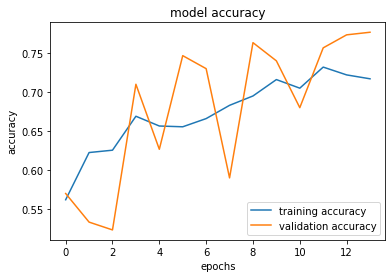

In [ ]:
import matplotlib.pyplot as plt
plt.plot(reg_history.history['accuracy'], label= 'training accuracy')
plt.plot(reg_history.history['val_accuracy'], label= 'validation accuracy')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

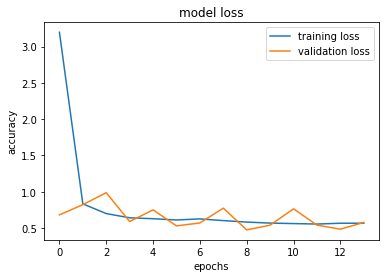

In [ ]:
plt.plot(reg_history.history['loss'], label= 'training loss')
plt.plot(reg_history.history['val_loss'], label= 'validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
unreg_model=  tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3),activation= 'relu',input_shape= (128,128,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #tf.keras.layers.batchnormalization(),
                                   #tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #tf.keras.layers.batchnormalization(),
                                   #tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   #tf.keras.layers.Dropout(0.5),
                                   tf.keras.layers.Dense(2, activation= 'softmax')            

])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
unreg_model.compile(loss= 'sparse_categorical_crossentropy', optimizer= RMSprop(lr=0.001), metrics= ['accuracy'])   

In [ ]:
unreg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(patience= 5)

In [ ]:
 unreg_history= unreg_model.fit(
     train_generator,
     validation_data= validation_generator,
     epochs= 15,
     steps_per_epoch= 100,
     validation_steps= 15,
     verbose= 2, callbacks= [early_stopping]
 )

Epoch 1/15
100/100 - 13s - loss: 0.8202 - accuracy: 0.5300 - val_loss: 0.7182 - val_accuracy: 0.5200
Epoch 2/15
100/100 - 13s - loss: 0.6996 - accuracy: 0.5615 - val_loss: 0.6541 - val_accuracy: 0.6633
Epoch 3/15
100/100 - 13s - loss: 0.6667 - accuracy: 0.6130 - val_loss: 0.5747 - val_accuracy: 0.7100
Epoch 4/15
100/100 - 13s - loss: 0.6497 - accuracy: 0.6340 - val_loss: 0.6369 - val_accuracy: 0.6433
Epoch 5/15
100/100 - 13s - loss: 0.6233 - accuracy: 0.6665 - val_loss: 0.5479 - val_accuracy: 0.6867
Epoch 6/15
100/100 - 13s - loss: 0.6077 - accuracy: 0.6795 - val_loss: 0.5445 - val_accuracy: 0.7533
Epoch 7/15
100/100 - 13s - loss: 0.5951 - accuracy: 0.6810 - val_loss: 0.5519 - val_accuracy: 0.7267
Epoch 8/15
100/100 - 13s - loss: 0.5824 - accuracy: 0.7065 - val_loss: 0.5350 - val_accuracy: 0.7500
Epoch 9/15
100/100 - 13s - loss: 0.5669 - accuracy: 0.7075 - val_loss: 0.5128 - val_accuracy: 0.7333
Epoch 10/15
100/100 - 13s - loss: 0.5571 - accuracy: 0.7205 - val_loss: 0.5065 - val_accura

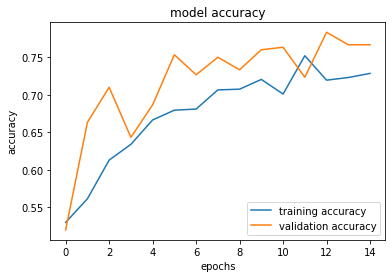

In [ ]:

plt.plot(unreg_history.history['accuracy'], label= 'training accuracy')
plt.plot(unreg_history.history['val_accuracy'], label= 'validation accuracy')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



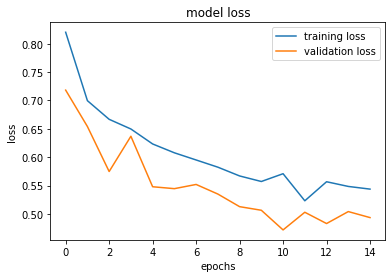

In [ ]:

plt.plot(unreg_history.history['loss'], label= 'training loss')
plt.plot(unreg_history.history['val_loss'], label= 'validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

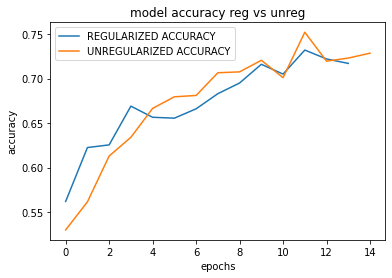

In [ ]:
plt.plot(reg_history.history['accuracy'],label= 'REGULARIZED ACCURACY')
plt.plot(unreg_history.history['accuracy'],label= 'UNREGULARIZED ACCURACY')
plt.title('model accuracy reg vs unreg')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

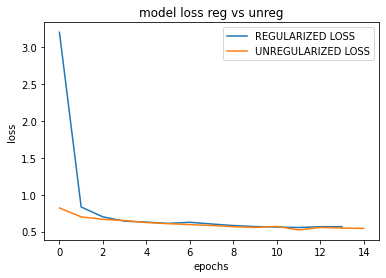

In [ ]:
plt.plot(reg_history.history['loss'],label= 'REGULARIZED LOSS')
plt.plot(unreg_history.history['loss'],label= 'UNREGULARIZED LOSS')
plt.title('model loss reg vs unreg')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
reg_model.save('catsvdogs_reg.h5')

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app1.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation= True)
def load_model():
  model= tf.keras.models.load_model('/content/catsvdogs_reg.h5')
  return model
model= load_model()
st.write(""" # Image classification """) 
file= st.file_uploader("Please upload an image", type= ['jpg','png'])
import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(image_data,model):
  size= (128,128)
  image= ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img= np.asarray(image)
  img_reshape= img[np.newaxis,...]
  prediction= model.predict(img_reshape)
  return prediction
if file is None:
  st.text('Pls upload an img file')
else:
  image= Image.open(file)
  st.image(image, use_column_width= True)
  predictions= import_and_predict(image, model)
  classes= ['cat','dog']
  string= 'This image may be:'+classes[np.argmax(predictions)]
  st.success(string)

Overwriting app1.py


In [ ]:
!ngrok authtoken 1ge0z8B2k4lruRa4D7E782iDhfa_4PfxsNzs4VzbjfDuaLrTZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app1.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url= ngrok.connect(port= 8501)
url

'http://deaf5b0ed9ef.ngrok.io'

In [ ]:
!cat '/content/nohup.out'

2020-10-02 04:57:59.131612: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8502
  External URL: http://35.233.144.153:8502

2020-10-02 04:58:00.306208: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-02 04:58:00.312932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-02 04:58:00.313879: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-10-02 04:58:00.313959: I tensorflow/stream_executor/platform/default/dso_lo